# Supervised Learning

__The goal of this class is to create a model that predicts the survival of Titanic passengers.__ 

To implement a supervised learning model, we will use pandas and sklearn, two popular machine learning libraries for Python.

In the first section, we will prepare the relevant features that will be used to train and test the model.

In the second section, we will train the model and evaluate its performance on the testing data.


# Dataset

In [1]:
import pandas as pd

df = pd.read_csv("titanic.csv.gz") 
df

,pclass,survival,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C


__VARIABLE DESCRIPTION__:

- __survival__        Survival(0 = No; 1 = Yes) 
- __pclass__          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- __name__            Name
- __sex__             Sex
- __age__             Age
- __sibsp__           Number of Siblings/Spouses Aboard
- __parch__           Number of Parents/Children Aboard
- __ticket__          Ticket Number
- __fare__            Passenger Fare 
- __cabin__           Cabin
- __embarked__        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

#  Import sklearn

In [2]:
import sklearn

# Data Preprocessing & Feature Selection

__1. Let's remove all the features that we won't use for predicting the survival rate like: `name`, `ticket` and `cabin`__
- __explanation__: these variables are too specific to predict `survival`

In [3]:
df.drop(columns=["name", "ticket", "cabin"], inplace = True)
df

,pclass,survival,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,14.4542,C
1305,3,0,female,NaN,1,0,14.4542,C
1306,3,0,male,26.5000,0,0,7.2250,C
1307,3,0,male,27.0000,0,0,7.2250,C


__2. Fill the missing values from the dataframe: `age` by its mean (29), `fare` by its mean (34)  and `embarked` by its mode ('S'):__
- __explanation__: most supervised learning algorithms do not support missing values, they must be handled explicitly

In [4]:
# You can check the number of missing values with this command:
# df.isna().sum()

import math

df.age = df.age.fillna(math.ceil(df.age.mean()))
df.fare = df.fare.fillna(math.ceil(df.fare.mean()))
df.embarked = df.embarked.fillna('S')
df

,pclass,survival,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,14.4542,C
1305,3,0,female,30.0000,1,0,14.4542,C
1306,3,0,male,26.5000,0,0,7.2250,C
1307,3,0,male,27.0000,0,0,7.2250,C


__3. Let's replace `sex` and `embarked` string values to only have numerical values for training: sex \[male -> 0, female -> 1\], embarked \[C -> 1, S -> 2, Q -> 3\]__
- __explanation__: most supervised learning algorithms require numerical values to operate

In [5]:
df.sex = df.sex.replace(['male', 'female'], [0, 1])
df.embarked = df.embarked.replace(['C', 'S', 'Q'], [1, 2, 3])
df

/var/folders/g4/0qh5hc412l12jr2g7w9xk50r0000gp/T/ipykernel_80158/3511188352.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.sex = df.sex.replace(['male', 'female'], [0, 1])
/var/folders/g4/0qh5hc412l12jr2g7w9xk50r0000gp/T/ipykernel_80158/3511188352.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.embarked = df.embarked.replace(['C', 'S', 'Q'], [1, 2, 3])


,pclass,survival,sex,age,sibsp,parch,fare,embarked
0,1,1,1,29.0000,0,0,211.3375,2
1,1,1,0,0.9167,1,2,151.5500,2
2,1,0,1,2.0000,1,2,151.5500,2
3,1,0,0,30.0000,1,2,151.5500,2
4,1,0,1,25.0000,1,2,151.5500,2
...,...,...,...,...,...,...,...,...
1304,3,0,1,14.5000,1,0,14.4542,1
1305,3,0,1,30.0000,1,0,14.4542,1
1306,3,0,0,26.5000,0,0,7.2250,1
1307,3,0,0,27.0000,0,0,7.2250,1


__4. Let's separate the `label` that we want to predict (survival) from the features used for training__


In [6]:
label = df.survival
df.drop(columns=["survival"], inplace = True)
label, df

(0       1
 1       1
 2       0
 3       0
 4       0
        ..
 1304    0
 1305    0
 1306    0
 1307    0
 1308    0
 Name: survival, Length: 1309, dtype: int64,
       pclass  sex      age  sibsp  parch      fare  embarked
 0          1    1  29.0000      0      0  211.3375         2
 1          1    0   0.9167      1      2  151.5500         2
 2          1    1   2.0000      1      2  151.5500         2
 3          1    0  30.0000      1      2  151.5500         2
 4          1    1  25.0000      1      2  151.5500         2
 ...      ...  ...      ...    ...    ...       ...       ...
 1304       3    1  14.5000      1      0   14.4542         1
 1305       3    1  30.0000      1      0   14.4542         1
 1306       3    0  26.5000      0      0    7.2250         1
 1307       3    0  27.0000      0      0    7.2250         1
 1308       3    0  29.0000      0      0    7.8750         2
 
 [1309 rows x 7 columns])

__5. As last step we need to devide the dataframe into a `test` and `training` set. We wil take 2/3 for training and 1/3 for testing__
- __explanation__: it is important to ensure that an algorithm is performing well on unseen data (which will be used for testing)

In [7]:
from sklearn.model_selection import train_test_split

# Create variables for the features and the label of the training set,
# as well as the features and the label of the test set
features_train, features_test, label_train, label_test = train_test_split(df, label, test_size=0.33, random_state=0)
features_train, features_test, label_train, label_test

(      pclass  sex      age  sibsp  parch     fare  embarked
 1048       3    1   1.0000      0      2  15.7417         1
 1034       3    0  30.0000      1      1  15.2458         1
 568        2    0  18.5000      0      0  13.0000         2
 615        3    0  20.0000      0      0   7.9250         2
 840        3    1  24.0000      0      0   8.8500         2
 ...      ...  ...      ...    ...    ...      ...       ...
 763        3    1   0.1667      1      2  20.5750         2
 835        3    0  30.0000      0      0   8.0500         2
 1216       3    1  30.0000      0      0   7.7333         3
 559        2    1  20.0000      0      0  36.7500         2
 684        3    1  32.0000      1      1  15.5000         3
 
 [877 rows x 7 columns],
       pclass  sex   age  sibsp  parch     fare  embarked
 1139       3    0  38.0      0      0   7.8958         2
 533        2    1  21.0      0      1  21.0000         2
 459        2    0  42.0      1      0  27.0000         2
 1150    

# Models

__1. Create and train a model based on Decision Trees that predicts the survival of Titanic passengers.__


https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [8]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier(random_state=0,max_depth=4)
dtree.fit(features_train, label_train)
score = dtree.score(features_train, label_train)
print("Training: ", score)

test_score = dtree.score(features_test, label_test)
print("Testing: ", test_score)

Training:  0.8209806157354618
Testing:  0.8101851851851852


In [9]:
print(features_test)

      pclass  sex   age  sibsp  parch     fare  embarked
1139       3    0  38.0      0      0   7.8958         2
533        2    1  21.0      0      1  21.0000         2
459        2    0  42.0      1      0  27.0000         2
1150       3    0  30.0      0      0  14.5000         2
393        2    0  25.0      0      0  31.5000         2
...      ...  ...   ...    ...    ...      ...       ...
1255       3    0  30.0      0      0   7.2292         1
1306       3    0  26.5      0      0   7.2250         1
822        3    0  41.0      0      0   7.8500         2
1114       3    0  30.0      0      0   7.0000         2
1110       3    0  32.0      0      0   7.8958         2

[432 rows x 7 columns]


__2. Visualize the decision tree that was created__

[Text(0.45535714285714285, 0.9, 'sex <= 0.5\ngini = 0.472\nsamples = 877\nvalue = [542, 335]\nclass = 0'),
 Text(0.19642857142857142, 0.7, 'age <= 9.5\ngini = 0.3\nsamples = 555\nvalue = [453, 102]\nclass = 0'),
 Text(0.32589285714285715, 0.8, 'True  '),
 Text(0.10714285714285714, 0.5, 'sibsp <= 2.5\ngini = 0.493\nsamples = 25\nvalue = [11.0, 14.0]\nclass = 1'),
 Text(0.07142857142857142, 0.3, 'age <= 0.792\ngini = 0.124\nsamples = 15\nvalue = [1, 14]\nclass = 1'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = 1'),
 Text(0.14285714285714285, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = 0'),
 Text(0.2857142857142857, 0.5, 'pclass <= 1.5\ngini = 0.277\nsamples = 530\nvalue = [442, 88]\nclass = 0'),
 Text(0.21428571428571427, 0.3, 'sibsp <= 0.5\ngini = 0.428\nsamples = 116\nvalue = [80, 36]\nclass = 0'),
 Text(0.17857142857142858, 0.1, 'gini = 0.347\nsam

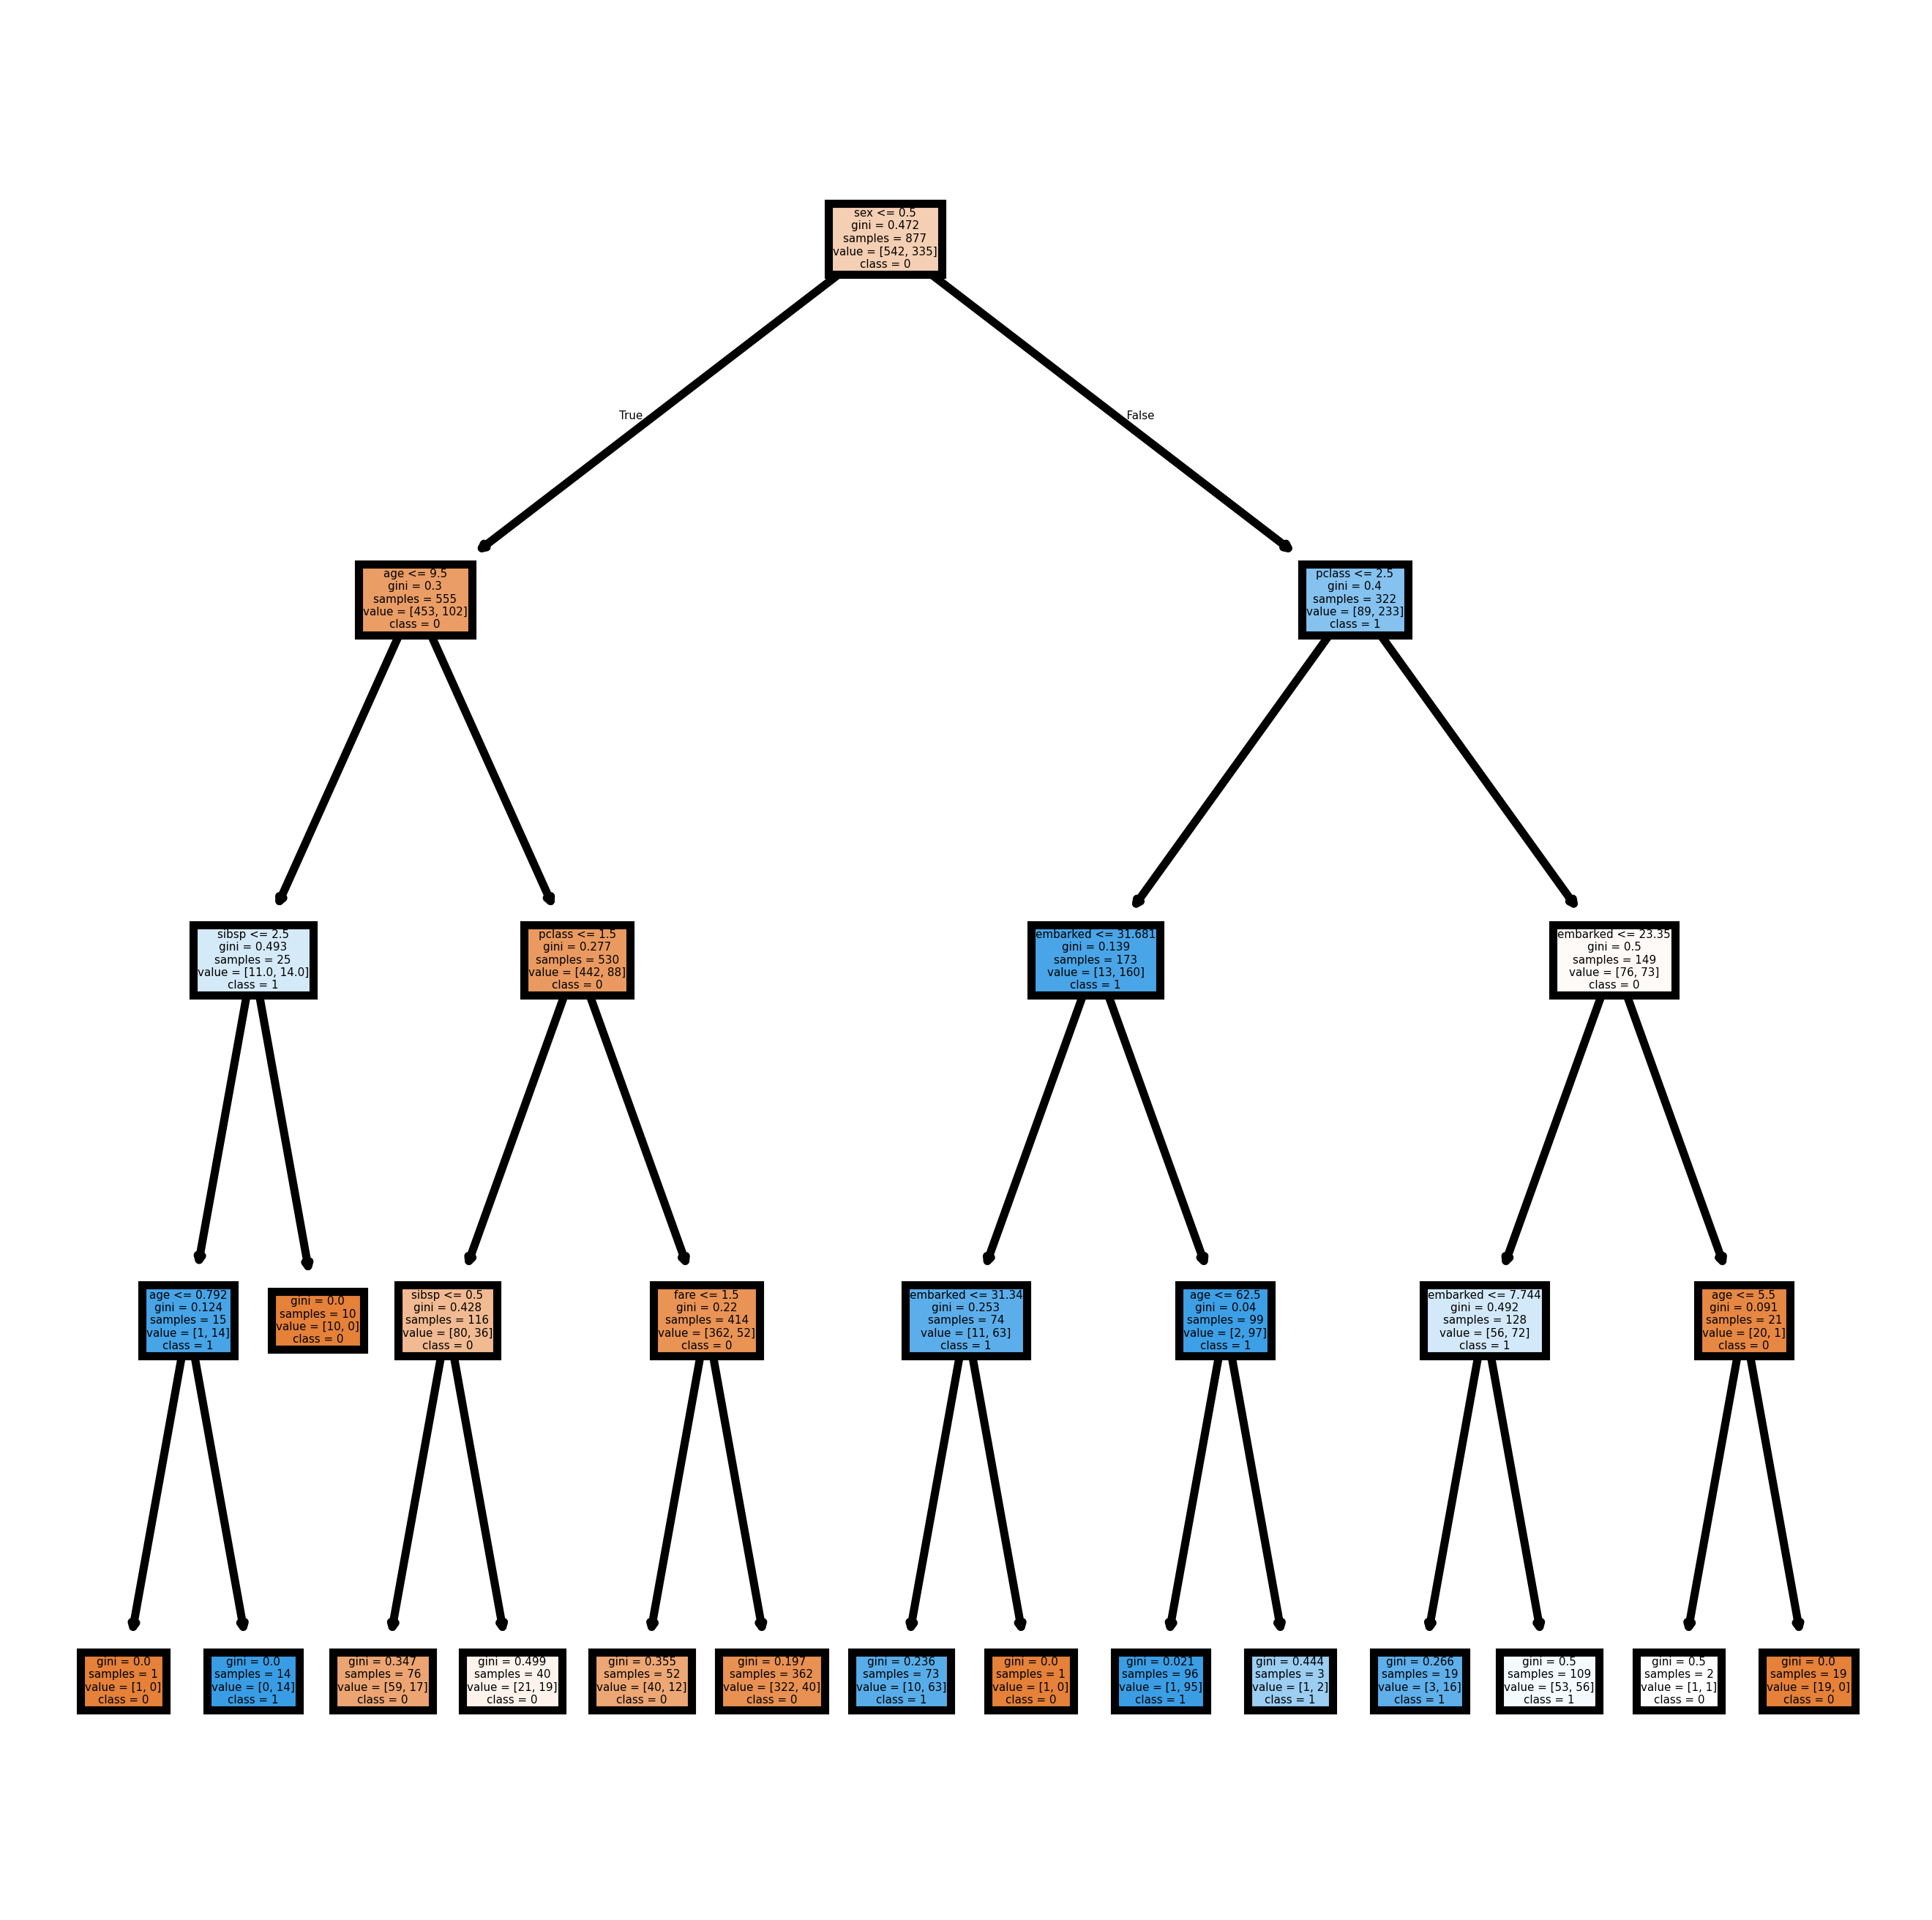

In [10]:
import matplotlib.pyplot as plt
fn = ["pclass", "sex",   "age",  "sibsp",  "parch",  "embarked", "fare"]
cn = ["0","1"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(dtree,feature_names = fn, 
                     class_names=cn,
                     filled = True)

__3. Use the trained model to make predicitons__

In [11]:
# Take some examples for prediction

# Values correspond to: class, sex, age, siblings, parents, ticket fare, embarked.
fakePerson1 = [[1,0,1,0,1,30.0,2]]
fakePerson2 = [[1,1,20,0,1,30.0,2]]

# Remember: survival 0 means the person does not survive.
print(dtree.predict(fakePerson1))
print(dtree.predict(fakePerson2))

# Add concrete examples

[1]
[1]


/Users/juliaboes/Dev/ai-everywhere/supervised_learning/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/juliaboes/Dev/ai-everywhere/supervised_learning/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


`Task:` If some time is left you can modify the dataset and try to retrain the model with less or different features and try to figure at which features are the least and the most important.